<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/Maths/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Frequentist Statistics

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
np.random.seed(42)

## Measures of central Tendencies
Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [ ]:
x = st.skewnorm.rvs(10,size=1000)

In [ ]:
x[:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

(array([180., 307., 242., 136.,  82.,  37.,  12.,   2.,   1.,   1.]),
 array([-0.20460929,  0.21662169,  0.63785267,  1.05908365,  1.48031463,
         1.90154561,  2.32277659,  2.74400757,  3.16523855,  3.58646953,
         4.00770051]),
 <BarContainer object of 10 artists>)

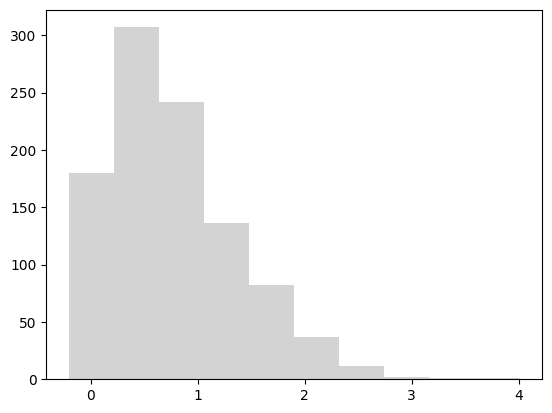

In [ ]:
fig, ax = plt.subplots()
plt.hist(x,color='lightgray')

### Mean


In [ ]:
xbar = x.mean()
xbar

0.7719211854654121

(array([180., 307., 242., 136.,  82.,  37.,  12.,   2.,   1.,   1.]),
 array([-0.20460929,  0.21662169,  0.63785267,  1.05908365,  1.48031463,
         1.90154561,  2.32277659,  2.74400757,  3.16523855,  3.58646953,
         4.00770051]),
 <BarContainer object of 10 artists>)

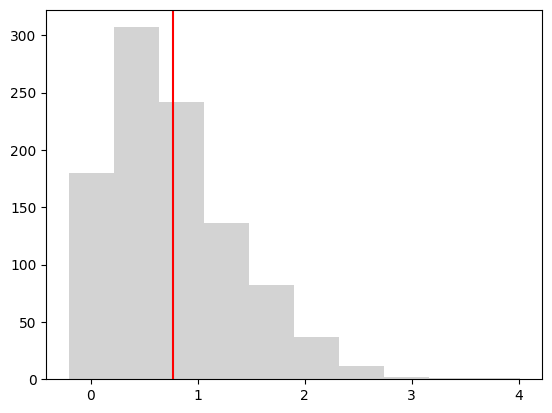

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=xbar,color='red')
plt.hist(x,color='lightgray')

### Median

In [ ]:
np.median(x)

0.651420257427958

### Mode
Most frequent data which is only applicable to the discrete random variables

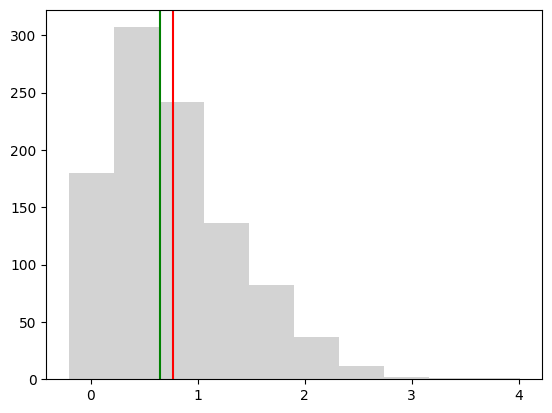

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=x.mean(),color='red')
plt.axvline(x=np.median(x),color='green')
_=plt.hist(x,color='lightgrey')

## Measures of Dispersion

### Variance
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var()

0.35528419278021617

### Standard Deviation
A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
x.var()**(1/2)

0.5960572059628305

In [ ]:
sigma = x.std()
sigma

0.5960572059628305

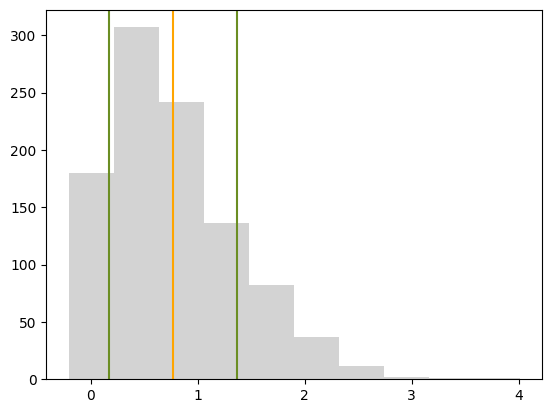

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

### Standard Error
A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma/x.size**(1/2)

0.018848983865986414

In [ ]:
st.sem(x) # Default to 1 dof

0.018858415432183823

In [ ]:
st.sem(x,ddof=0)

0.018848983865986414

Standard error enable us to compare whether the means of two distributions differ significantly

## Gaussian Distribution


In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

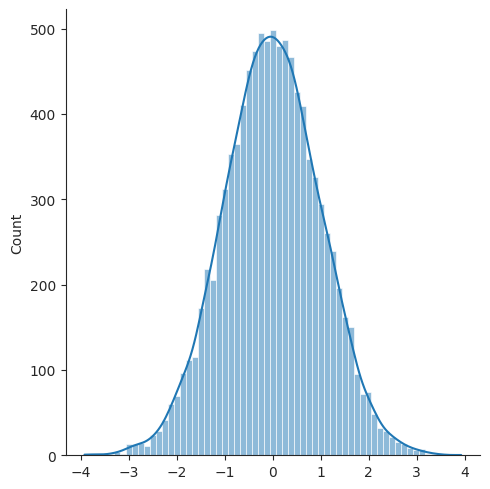

In [ ]:
_= sns.displot(x,kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [ ]:
x.mean()

-0.01626305454909193

In [ ]:
x.std()

1.0039756140435032

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).


Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance).
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### Central Limit Theorem

In [ ]:
x_sample = np.random.choice(x,size=7,replace=False)

In [ ]:
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949])

In [ ]:
x.mean()  # Mean of this sample from the distribution

-0.01626305454909193

In [ ]:
def sample_mean_calculator(input_data,sample_size,n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(input_data,size=sample_size,replace=False)
    sample_means.append(sample.mean())
  return sample_means

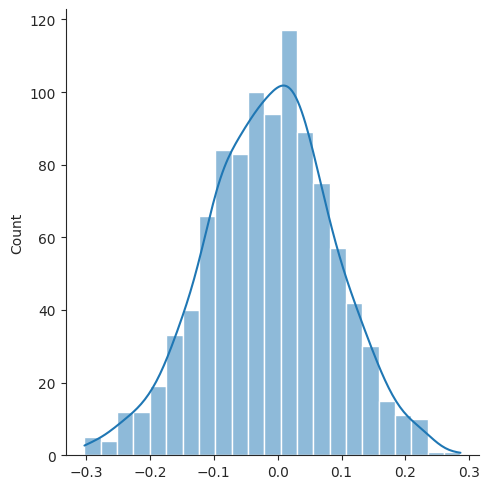

In [ ]:
_=sns.displot(sample_mean_calculator(x,100,1000),kde=True)

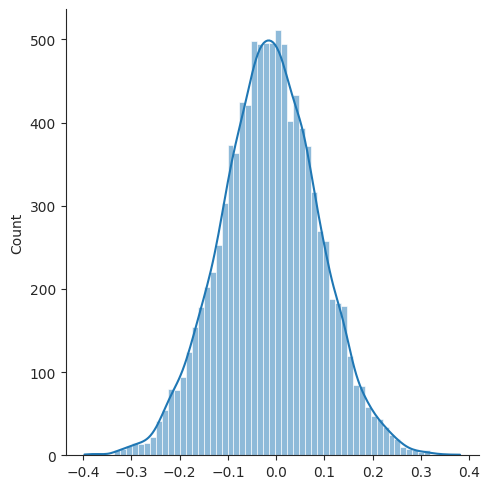

In [ ]:
_=sns.displot(sample_mean_calculator(x,100,10000),kde=True)

In [ ]:
s = st.skewnorm.rvs(10,size=10000)

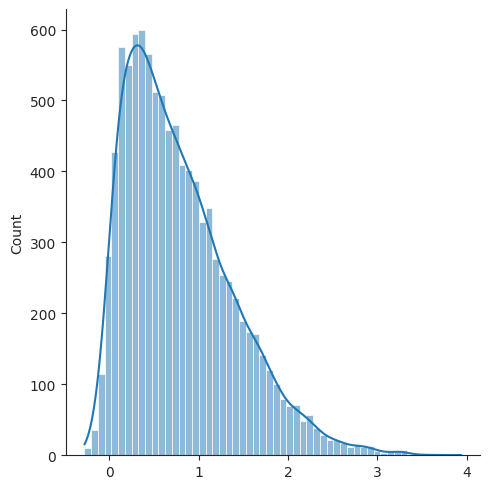

In [ ]:
_=sns.displot(s,kde=True)

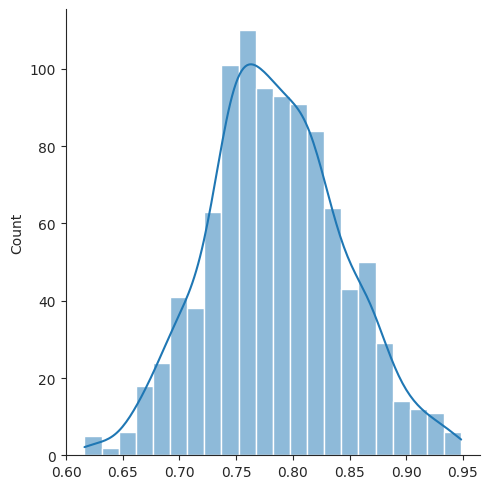

In [ ]:
sns.displot(sample_mean_calculator(s,100,1000),kde=True)

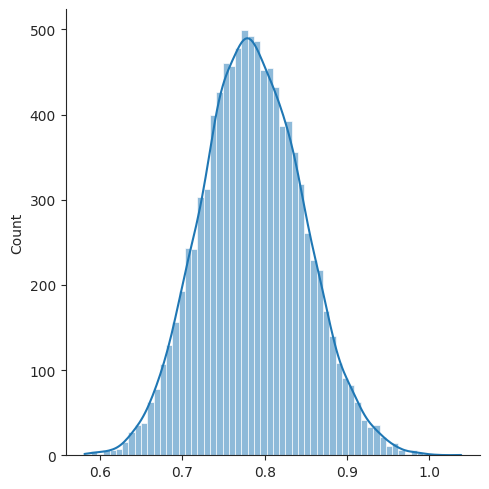

In [ ]:
sns.displot(sample_mean_calculator(s,100,10000),kde=True)   # Although it is skewed distribution th emeans of the samples formss normal distributions

## Sampling from Multimodel distribution

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

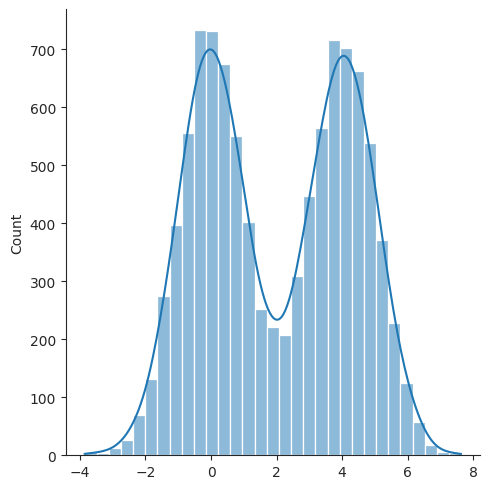

In [ ]:
_=sns.displot(m,kde=True)

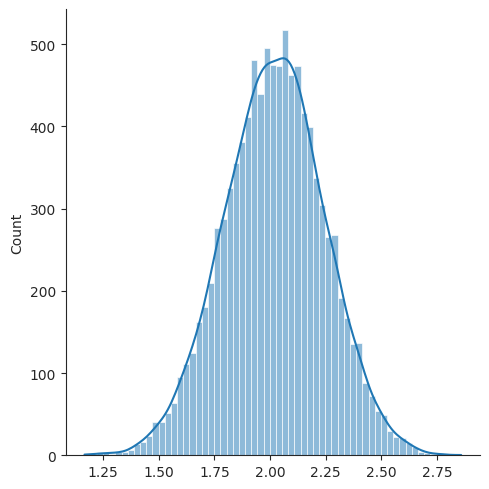

In [ ]:
sns.displot(sample_mean_calculator(m,100,10000),kde=True)

## Sampling from Uniform distribution'

In [ ]:
u = np.random.uniform(size=10000)

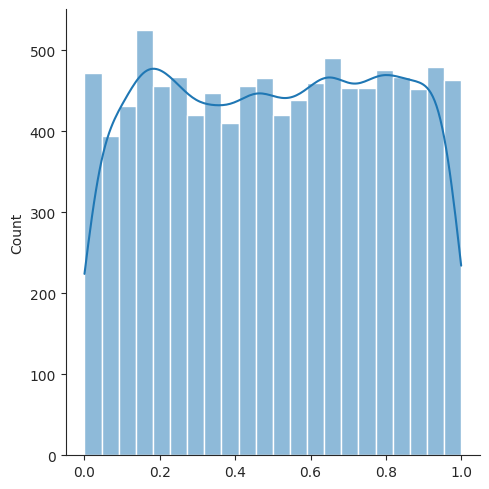

In [ ]:
sns.displot(u,kde=True)

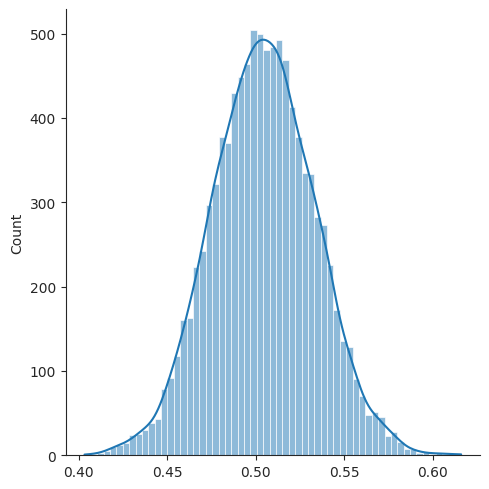

In [ ]:
sns.displot(sample_mean_calculator(u,100,10000),kde=True)

## Z-Score

Assuming normally distributed data, Z score indicates how many standard deviations away from the mean a data point is
$$ z = \frac{x_i-\mu}{\sigma} $$
That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [ ]:
x_i = 85
mu =60
sigma = 10

In [ ]:
x = np.random.normal(mu,sigma,10000)

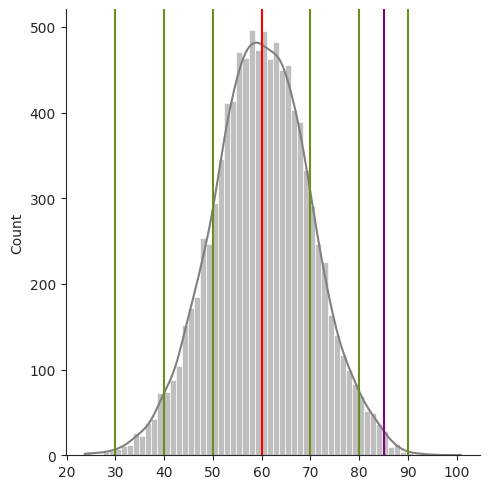

In [ ]:
sns.displot(x,kde=True,color='gray')
ax.set_xlim(0,100)
plt.axvline(mu,color='red')
for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu+v*sigma,color='olivedrab')
_=plt.axvline(x_i,color='purple')

Your Z-score is 2.5 SD from the mean

In [ ]:
z_score = (x_i-mu)/sigma

In [ ]:
z_score

2.5

In [ ]:
z = (x_i-x.mean())/x.std()
z

2.4765706704810766

Less than one percent of the class outperformed you

In [ ]:
len(np.where(x>85)[0])

56

In [ ]:
100*69/10000

0.69

In [ ]:
np.percentile(x,99)

83.47026977146854

In contract the mean score of your peers is 90 and the standard deviation is 2

In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu,sigma,10000)

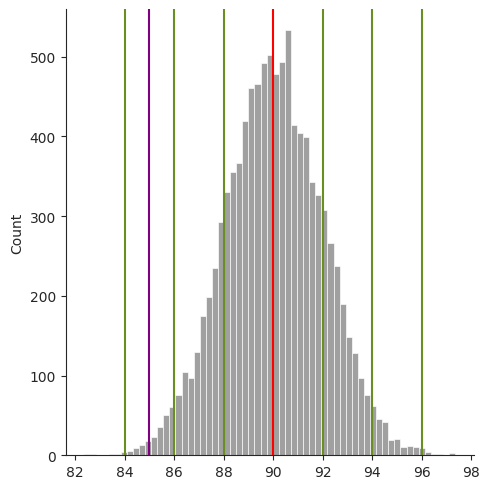

In [ ]:
sns.displot(y,color='gray')
ax.set_xlim(0,100)
plt.axvline(mu,color='red')
for v in [-3,-2,-1,1,2,3]:
  plt.axvline(x=mu+v*sigma,color='olivedrab')
_=plt.axvline(x_i,color='purple')

In [ ]:
z = (x_i-mu)/sigma
z

-2.5

In [ ]:
z = (x_i-y.mean())/y.std()
z

-2.5576072155627325

In [ ]:
len(np.where(y>85)[0])

9953

In [ ]:
100*9940/10000

99.4

In [ ]:
np.percentile(y,1)

85.49921958317967

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

## P Values

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [ ]:
p_below*10000  # If we have infinite strength 62 out of them are below -2.5 z score

62.096653257761325

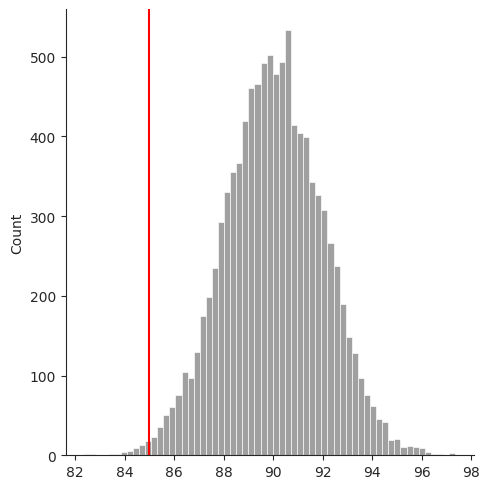

In [ ]:
sns.displot(y,color='gray')
_=plt.axvline(mu-2.5*sigma,color='red')

In [ ]:
st.norm.cdf(2.5)

0.9937903346742238

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [ ]:
p_above*10000

62.09665325776159

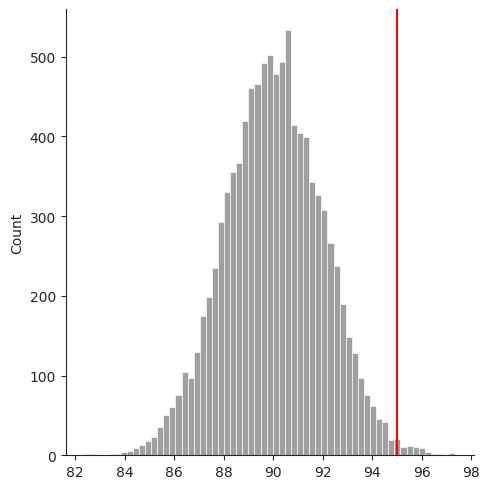

In [ ]:
sns.displot(y,color='gray')
_=plt.axvline(mu+2.5*sigma,color='red')

In [ ]:
p_outside = p_below + p_above
p_outside  # Probability of having outside 2.5 z-score

0.01241933065155229

In [ ]:
p_outside*10000

124.1933065155229

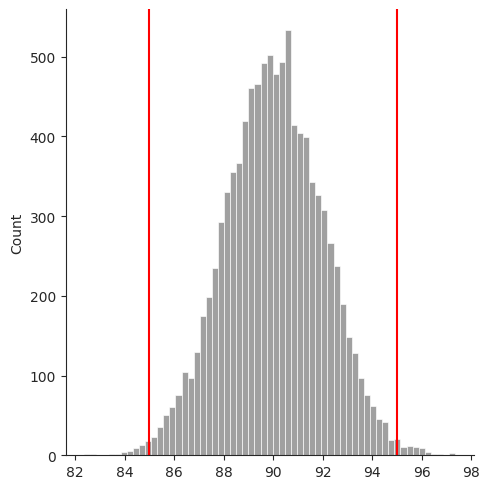

In [ ]:
sns.displot(y,color='gray')
_=plt.axvline(mu+2.5*sigma,color='red')
_=plt.axvline(mu-2.5*sigma,color='red')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$. means it is unlikely happens by chance

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook]

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$. We say that coin is not fair

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

In [ ]:
st.norm.ppf(0.025)

-1.9599639845400545

In [ ]:
st.norm.ppf(0.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.
i.e Rejected
Means the data point comes from the rejected region is generally not taken from that distribution

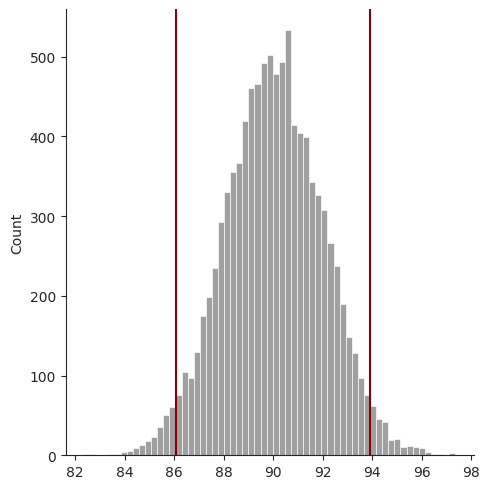

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch?
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition?


**Exercises**

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises?
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?

**Spoiler alert**: Solutions below

1a. This result is at the mean, which is also the median for a normal distribution; exactly half of the values are above as they are below. This corresponds to the highest possible $p$-value, $p=1$, because any value in the distribution is guaranteed to be above it or below it:

In [ ]:
p_below = st.norm.cdf(0)
p_below

0.5

In [ ]:
p_above = 1 - st.norm.cdf(0)
p_above

0.5

In [ ]:
p_below + p_above  # We'll get the heighest p value when the observed p value is the mean i.e 1 and the low value is 0

1.0

In [ ]:
def p_from_z(z):
  return 2*st.norm.cdf(-abs(z))

In [ ]:
p_from_z(0)

1.0

1.b The probability of the values being below  z=-2 is

In [ ]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

above z=2

In [ ]:
p_above = st.norm.cdf(2)
p_above

0.9772498680518208

The probability of the values below z=-2 and above z=2 is

In [ ]:
p_from_z(2)

0.04550026389635839

1.c

In [ ]:
p_from_z(4)

6.334248366623973e-05

(Incidentally, very small *p* values are often reported as **negative log *P*** values as these are much easier to read...)

In [ ]:
-np.log10(p_from_z(4))

4.198304911892499

2.
The p values of 1=  1

2 = 0.045

3 = 6.334248366623973e-05

as 2 and 3 are less than 0.05 so ther are statistically significant

## Student Single Sample T-test

Recalling the formula for calculating a *z*-score:
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by:
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where:
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments:

In [ ]:
x = [48, 50, 54, 60]

In [ ]:
xbar = np.mean(x)
xbar

53.0

In [ ]:
sx = st.sem(x)
sx

2.6457513110645907

In [ ]:
t = (xbar-50)/sx   #Here 50 is the assumed mean
t

1.1338934190276817

In [ ]:
def p_from_t(my_t,my_n):
  return 2 * st.t.cdf(-abs(my_t),my_n-1)  # 2nd argument is the degree of freedom

In [ ]:
p_from_t(t,len(x))

0.3392540508564543


**Here the p value is >0.05 so it is not a statistically significant value so we can say the data is not vary significantly vary from the baseline process of 50. There is a 35% chance that we get a 53 as mean standalone

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method:

In [ ]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

## Welch's Independent T test
In the cases where we have 2 samples and we want to compare then we use this Independent T test

In [ ]:
penguins = sns.load_dataset('penguins').dropna()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
np.unique(penguins.species,return_counts=True)  # np.unique(penguins['species],return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [ ]:
# Creating dataframe with only the Adelie penguins
adelie = penguins[penguins.species=='Adelie']

In [ ]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [ ]:
np.unique(adelie.island,return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [ ]:
np.unique(adelie.sex,return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

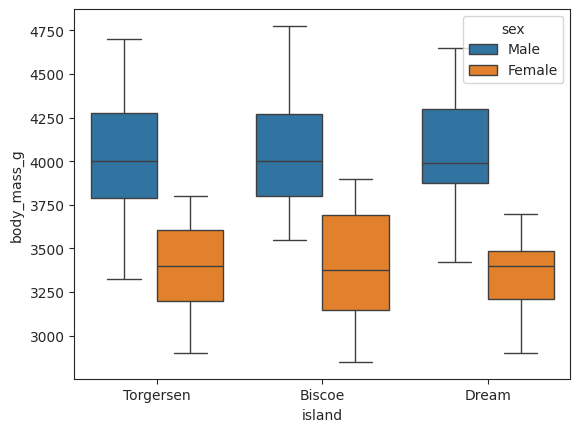

In [ ]:
_= sns.boxplot(x='island',y='body_mass_g',hue='sex',data=adelie)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look:

We can observe that the weights of the male penguins does'nt vary much based on the islands but the weights of the female adelie penguins differ based on the islands

In [ ]:
f = adelie[adelie.sex=='Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [ ]:
m = adelie[adelie.sex=='Male']['body_mass_g'].to_numpy()/1000

In [ ]:
fbar = f.mean()
fbar

3.368835616438356

In [ ]:
mbar = m.mean()
mbar

4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where:
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

**N.B.**: Student's independent *t*-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [ ]:
st.sem(f)**2

0.0009940498530055675

In [ ]:
sf = f.var(ddof=1)
sf

0.07256563926940643

In [ ]:
sm = m.var(ddof=1)
sm

0.12027825342465753

In [ ]:
nf = f.size
nf

73

In [ ]:
nm = m.size
nm

73

In [ ]:
t = (fbar-mbar)/(sf/nf + sm/nm)**0.5
t

-13.126285923485879

 Welch–Satterthwaite equation,  for calculating the degree of freedom

In [ ]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [ ]:
df = ws_eqn(sf,sm,nf,nm)
df

135.69357893530386

In [ ]:
p_from_t(t,df+1)

6.402319748031518e-26

In [ ]:
p = 2 * st.t.cdf(-abs(t),df)
p

6.402319748031518e-26

This values is nearly equals to zero and less than 0.05 so we can say there is a weights difference in males and females

In [ ]:
p = st.ttest_ind(f,m,equal_var=False)
p

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031518e-26, df=135.69357893530386)

## Student's Paired T-test

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*.

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test.

In [ ]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [ ]:
np.unique(exercise.diet,return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

In [ ]:
np.unique(exercise.kind,return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

In [ ]:
## Select no fat and walking group
walk_no = exercise[(exercise.diet=='no fat') & (exercise.kind=='walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


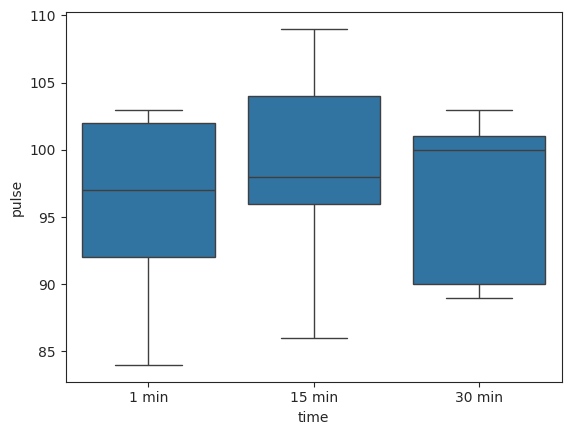

In [ ]:
_= sns.boxplot(x='time',y='pulse',data=walk_no)

We can see that the heart beat after 15min increases gradually because median is more. Is the average change is statistically significant

In [ ]:
min1 = walk_no[walk_no.time=='1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [ ]:
min15 = walk_no[walk_no.time=='15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [ ]:
min30 = walk_no[walk_no.time=='30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [ ]:
min1.mean()

95.6

In [ ]:
min15.mean()

98.6

In [ ]:
min30.mean()

96.6

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

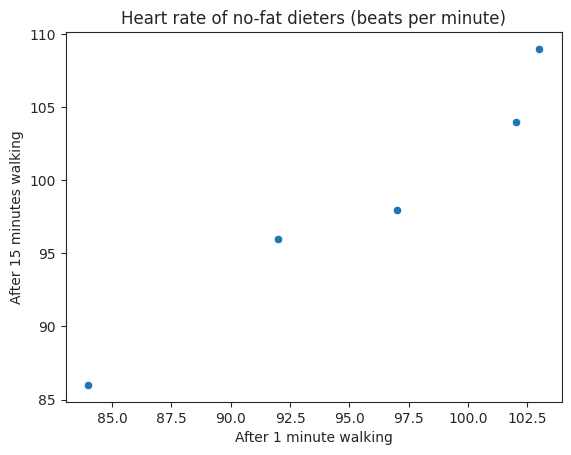

In [ ]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test:
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$
Where:
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_\bar{d}$ is the standard error of the differences

In [ ]:
# Differences
d = min15-min1

In [ ]:
dbar = d.mean()
dbar

3.0

In [ ]:
sd = st.sem(d)
sd

0.8944271909999159

In [ ]:
t = (dbar-0)/sd
t


3.3541019662496847

In [ ]:
p_from_t(t,d.size)

0.02846020325433834

In [ ]:
st.ttest_rel(min1,min15)

TtestResult(statistic=-3.3541019662496847, pvalue=0.02846020325433834, df=4)

AS p value is less than .05 we can say they are not equal min1 and min15 so there is a change in heart rate i.e it increased

In contrast, if we were to put the same values into an independent t-test...

In [ ]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=0.5729114862838532, pvalue=0.5826164805627767, df=7.91150470414055)

**Exercises on Comparing means**
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process?
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?


In [ ]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [ ]:
xbar = x.mean()
xbar

54.625

In [ ]:
sx = st.sem(x)
sx

1.8892317032517287

In [ ]:
t = (xbar-50)/sx
t

2.448085108904054

In [ ]:
p_from_t(t,len(x))

0.0442312968303811

In [ ]:
st.ttest_1samp(x,50)

TtestResult(statistic=2.448085108904054, pvalue=0.0442312968303811, df=7)

2nd question

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

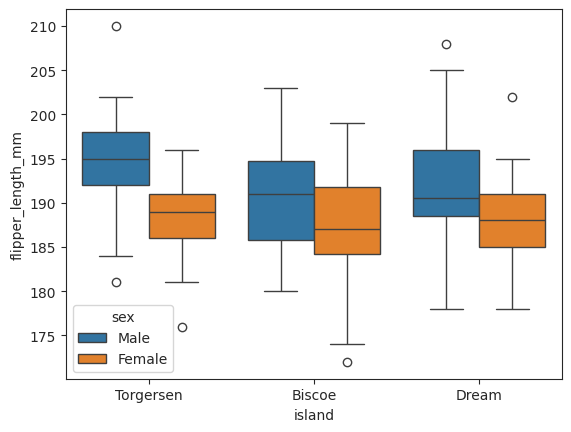

In [ ]:
_=sns.boxplot(x='island',y='flipper_length_mm',hue='sex',data=adelie)

In [ ]:
f = adelie[(adelie.sex=='Female') & (adelie.island=='Dream')]['flipper_length_mm'].to_numpy()

In [ ]:
m = adelie[(adelie.sex=='Male') & (adelie.island=='Dream')]['flipper_length_mm'].to_numpy()

In [ ]:
f.mean()

187.85185185185185

In [ ]:
m.mean()

191.92857142857142

In [ ]:
t = st.ttest_ind(f,m,equal_var=False)
t

TtestResult(statistic=-2.446038619999187, pvalue=0.017898599613024185, df=51.48552818449215)

here the p value is 0.017 which is less than 0.05 so we can say the male penguins of mean (191.9) are longer than the female (187.8)

3rd question

In [ ]:
low_rest = exercise[(exercise.kind=='rest') & (exercise.diet=='low fat')]
low_rest

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


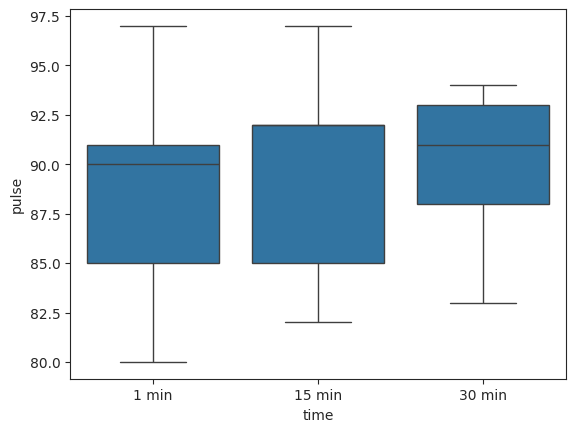

In [ ]:
_=sns.boxplot(x='time',y='pulse',data=low_rest)

In [ ]:
min1 = low_rest[low_rest.time=='1 min']['pulse'].to_numpy()
min1

array([85, 90, 97, 80, 91])

In [ ]:
min1.mean()

88.6

In [ ]:
min15 = low_rest[low_rest.time=='15 min']['pulse'].to_numpy()
min15

array([85, 92, 97, 82, 92])

In [ ]:
min15.mean()

89.6

In [ ]:
st.ttest_rel(min1,min15)

TtestResult(statistic=-2.23606797749979, pvalue=0.08900934250008564, df=4)

P value is 0.08 > 0.05 so null hypothesis is accepted i.e no statistically significant difference

## Confidence Interval

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula:
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where:
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast:

In [ ]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [ ]:
xbar = x.mean()
xbar

54.625

In [ ]:
s = x.std()
n = x.size

In [ ]:
z = 1.96

In [ ]:
def CI_error_cal(my_z,my_s,my_n):
  return my_z*(my_s/my_n**0.5)

In [ ]:
CI_err = CI_error_cal(z,s,n)

In [ ]:
CI_err

3.4637403013216796

In [ ]:
xbar + CI_err

58.08874030132168

In [ ]:
xbar - CI_err

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined:

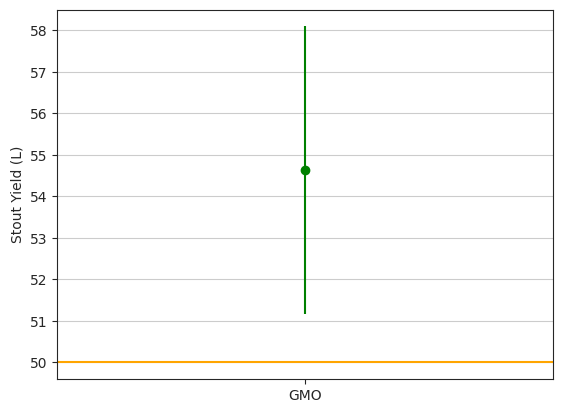

In [ ]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CI_err], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

In [ ]:
fCIerr = CI_error_cal(z,sf,nf)
mCIerr = CI_error_cal(z,sm,nm)

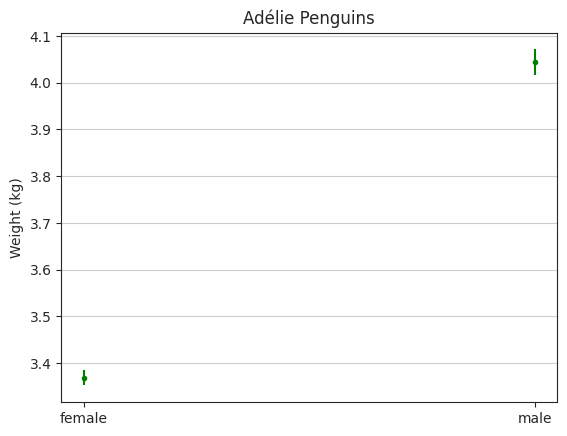

In [ ]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr],
                fmt='.', color='green')

As they are not overlapped there is a significant change in that data

In [ ]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [ ]:
means = [t.mean(),b.mean(),d.mean()]

In [ ]:
s_t,sb,sd = st.sem(t),st.sem(b),st.sem(d)

In [ ]:
nt, nb, nd = t.size, b.size, d.size

In [ ]:
CIerrs = [CI_error_cal(z, s_t, nt), CI_error_cal(z, sb, nb), CI_error_cal(z, sd, nd)]

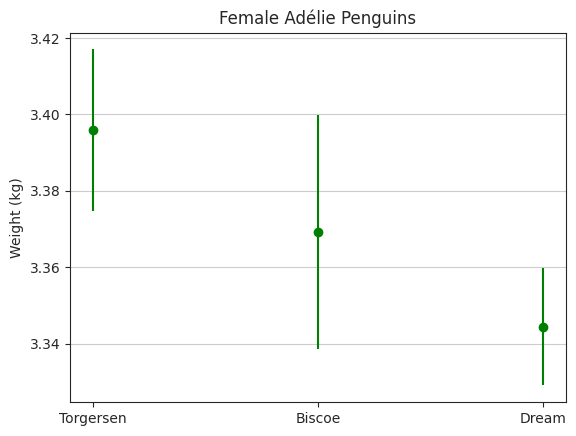

In [ ]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs,
                fmt='o', color='green')

Torgerson and Biscoe are overlapped and Biscoe and Dream are overalapped  so there is no significant difference and there is significant difference in Torgerson and Dream

## ANOVA : Analysis of Variance

**Analysis of variance** (ANOVA) enables us to compare more than two samples (e.g., all three islands in the case of penguin weight) in a single statistical test.

To apply ANOVA, we must make three assumptions:
1. Independent samples
2. Normally-distributed populations
3. *Homoscedasticity*: Population standard deviations are equal

ANOVA might be the least widely-applicable topic within Intro to Stats to ML so in the interest of time, we'll skip straight to the Python code:

In [ ]:
st.f_oneway(t,b,d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

0.7>0.05 so there is no statistically significant difference

# Correlation

## Pearson Correlation Coefficient

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$



A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

In [ ]:
sns.set_style('darkgrid')

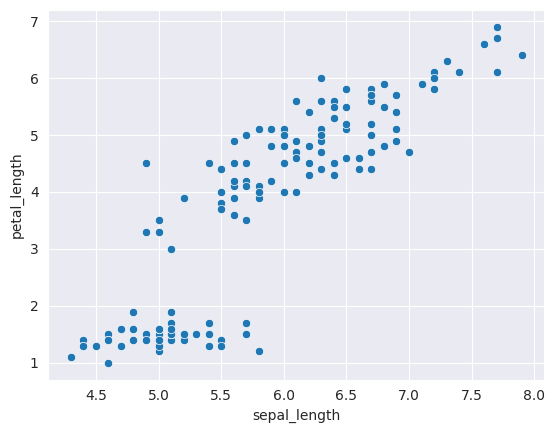

In [ ]:
_= sns.scatterplot(x=x,y=y)

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar,ybar = x.mean(),y.mean()

In [ ]:
products=[]
for i in range(n):
  products.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(products)/n
cov

1.2658200000000006

In [ ]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

(This formula standardizes the correlation coefficient, taking into account the sample size *n* and the strength of the relationship *r*, to produce a *t*-statistic that follows [Student's *t*-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).)

In [ ]:
t = r * ((n-2)/(1-r**2))**0.5
t

21.646019345759807

In [ ]:
p_from_t(t,n-1)

1.0386674194495906e-47

**Null Hypothesis**: Given features are Independent


**Alternative Hypothesis**: There is a relationship

This p value nearly equal to 0 states that the sepal length and the petal length are statistically significant i.e they are correlated

All of the above can be done in a single line with SciPy's `pearsonr()` method:

In [ ]:
st.pearsonr(x,y)

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498827e-47)

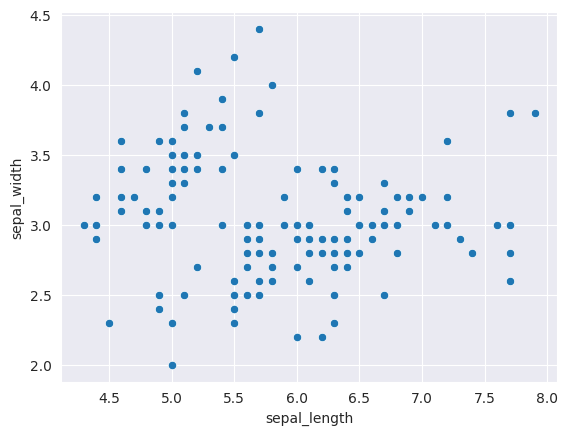

In [ ]:
_= sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [ ]:
st.pearsonr(iris.sepal_length,iris.sepal_width)   # pvalue is >0.05 so they are not statistically significant they are independent

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

## Coefficient of Determination

...also known as $r^2$, this is the proportion of variance in one variable explained by another.

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [ ]:
rsq = r**2
rsq

0.7599546457725157

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment 2.)

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length:

In [ ]:
st.pearsonr(iris.sepal_length,iris.sepal_width)[0]**2

0.013822654141080705

## Correlation vs Causation

Causation refers to a relationship between two events or variables where one event (the cause) directly leads to the occurrence of the other event (the effect). In other words, causation means that a change in one variable directly produces a change in another.

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. (Thousands of spurious correlations are provided [here](https://www.tylervigen.com/spurious-correlations) for your amusement.)

There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.


In brief, three criteria are required for inferring causal relationships:

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied.
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials.


Some examples of where we could infer causality from correlation in ML:
* Additional neurons --> higher accuracy
* Additional servers or RAM --> shorter inference time
* Removal of pronouns --> less demographic bias in model

## Correcting for Multiple Comparisions

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$:

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

https://chatgpt.com/c/66fbcccc-a6bc-800a-8492-1cbe275a50a0

## Regression

## Linear Least Square for Fitting a Line to the Points on a Cartesian Plane

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
x = iris.sepal_length

In [ ]:
y = iris.petal_length

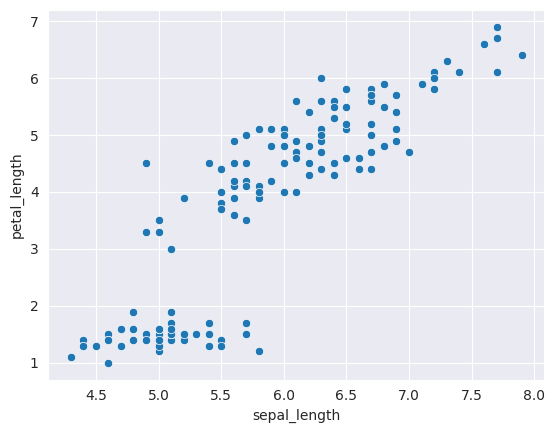

In [ ]:
_= sns.scatterplot(x=x,y=y)

Consider fitting a line to points on a **Cartesian plane** (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$):

$$ y = \beta_0 + \beta_1 x $$

This corresponds to the case where we have a single feature (a single predictor variable, $x$) in a regression model:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

The $\epsilon$ term denotes **error**. For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = 0$.

Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points.

(Note that sepal length may not be an ideal example of a predictor variable, but these iris data are conveniently available at this stage of the notebook.)

Here we can't say that sepal length is the feature t predict the petal length i.e we can't establish a causation relationship although we can find that line using the regression

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

$ \hat{\beta}_1 $ is the estimate

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y}_i - y_i)^2$, which we isolate from $\text{cov}(x,y)$ via division by $\sigma^2_x$)

In [ ]:
n = iris.sepal_length.size
n

150

In [ ]:
xbar,ybar = x.mean(),y.mean()

In [ ]:
products=[]
for i in range(n):
  products.append((x[i]-xbar)*(y[i]-ybar))


In [ ]:
cov = sum(products)/n
cov

1.2658200000000006

In [ ]:
beta1 = cov/np.var(x)
beta1

1.8584329782548419

with tha $ \hat {\beta}_1 $ in hand by rearranging the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [ ]:
beta0 = ybar - beta1*xbar
beta0

-7.101443369602459

In [ ]:
xline = np.linspace(4,8,1000)
yline = beta0 + beta1*xline

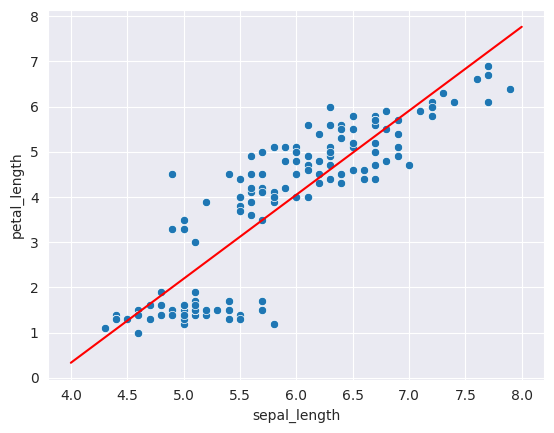

In [ ]:
sns.scatterplot(x=x,y=y)
_= plt.plot(xline,yline,color='red')

In regression model terms, if we were provided with a sepal length $x_i$ we could now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the petal length of an iris:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

For instance, our model predicts that an iris with a 5.5cm-long sepal would have 3.1cm-long petal:

In [ ]:
x_i = 5.5
y_i = beta0 + beta1*x_i
y_i

3.1199380107991725

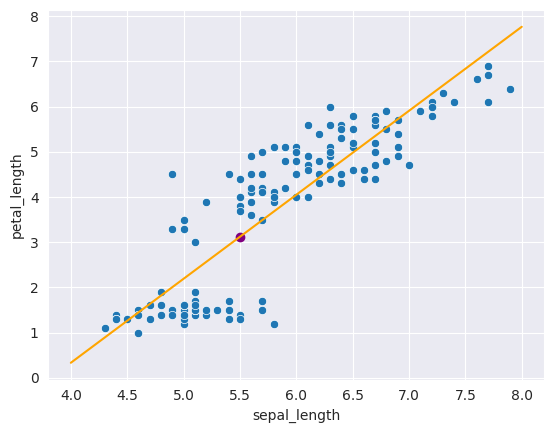

In [ ]:
sns.scatterplot(x=x,y=y)
plt.plot(xline,yline,color='orange')
_= plt.scatter(x_i,y_i,marker='o',color='purple')

**As a second Example**:

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

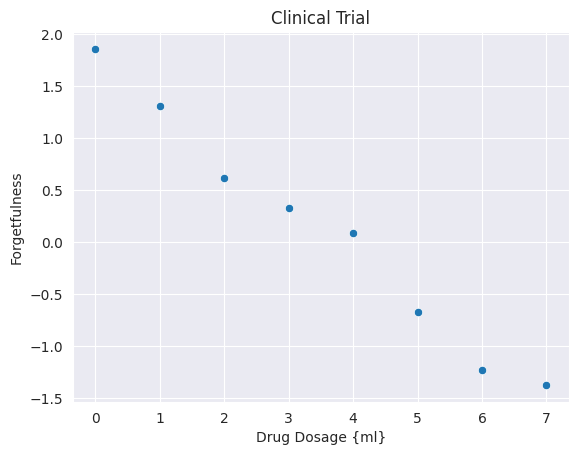

In [ ]:
sns.scatterplot(x=x,y=y)
plt.xlabel('Drug Dosage {ml}')
plt.ylabel('Forgetfulness')
_=plt.title('Clinical Trial')

In [ ]:
xbar,ybar = x.mean(),y.mean()

In [ ]:
cov_mat = np.cov(x,y)
cov_mat

# [[var(x),cov(x,y)]
#  [cov(x,y),var(y)]]

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

In [ ]:
beta0 = ybar - beta1*xbar
beta0

1.76

In [ ]:
xline = np.linspace(0,7,1000)
yline = beta0 + beta1*xline

By administering 4.5mL of the drug, our model predicts a forgetfulness score of -0.35:

In [ ]:
x_i = 4.5
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

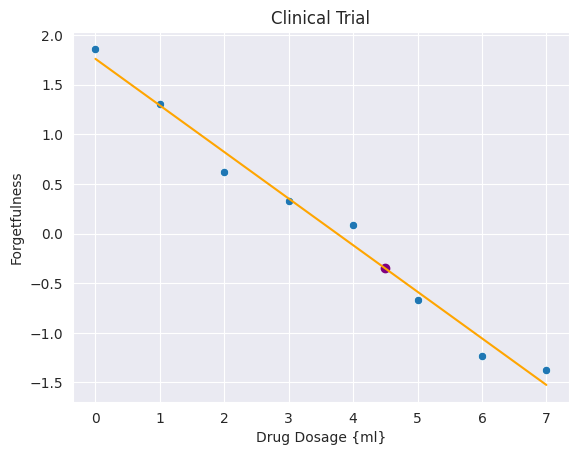

In [ ]:
sns.scatterplot(x=x,y=y)
plt.xlabel('Drug Dosage {ml}')
plt.ylabel('Forgetfulness')
plt.plot(xline,yline,color='orange')
plt.scatter(x_i,y_i,marker='o',color='purple')
_=plt.title('Clinical Trial')


**Exercise**: With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [ ]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
adelie = penguins[penguins.species == 'Adelie']
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [ ]:
x = adelie[adelie.sex == 'Female'].flipper_length_mm.to_numpy()
y = adelie[adelie.sex == 'Female'].body_mass_g.to_numpy()/1000

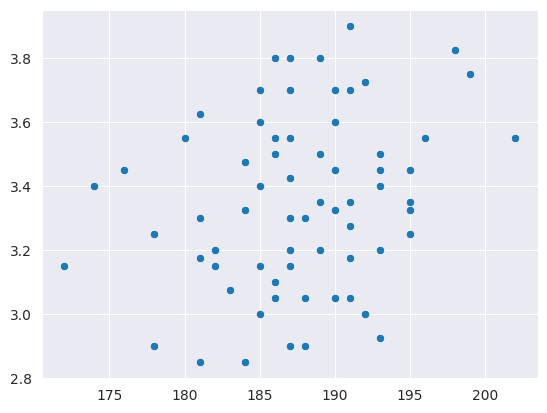

In [ ]:
_= sns.scatterplot(x=x,y=y)

In [ ]:
cov_mat = np.cov(x,y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta0 = y.mean() - beta1*x.mean()

In [ ]:
xline = np.linspace(170,205,1000)
yline = beta0 + beta1*xline

In [ ]:
x_i = 197
y_i = beta0 + beta1*x_i
y_i

3.485368551563184

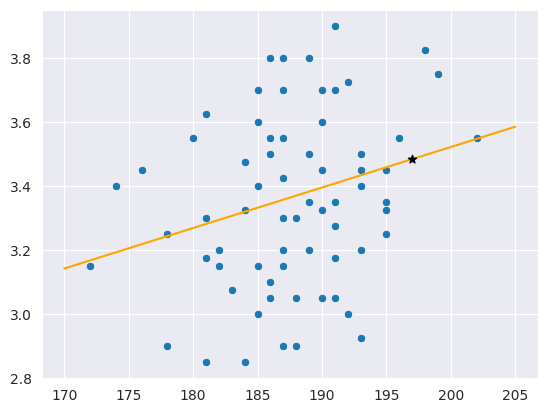

In [ ]:
sns.scatterplot(x=x,y=y)
plt.plot(xline,yline,color='orange')
_=plt.scatter(x_i,y_i,marker='*',color='black',zorder=3)

## Ordinary Least Squares

**Ordinary least squares** (OLS) is a linear least squares method we can use to estimate the parameters of regression models that have more than one predictor variable, e.g.:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon $$

Generalizing to $m$ predictors:
$$ y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon $$

To keep the calculations as simple as possible, however, for now we'll stick with a single predictor $x$ (in an example adapted from [here](https://en.wikipedia.org/wiki/Linear_least_squares#Example)):

In [ ]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

In [ ]:
sns.set_style('whitegrid')

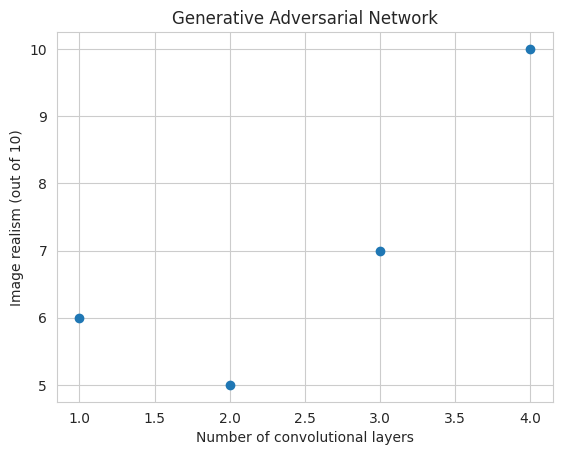

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

As is typical in regression model-fitting, we have an *overdetermined* system of linear algebra equations. From the general regression equation $y = \beta_0 + \beta_1 x$, we have four equations (one for each instance $i$) with the two unknown parameters $\beta_0$ and $\beta_1$ shared across the system.
$$ 6 = \beta_0 + \beta_1 $$
$$ 5 = \beta_0 + 2\beta_1 $$
$$ 7 = \beta_0 + 3\beta_1 $$
$$ 10 = \beta_0 + 4\beta_1 $$

Since we have more equations than unknowns, we can't solve for the parameters through algebraic rearraging. We can, however, estimate parameters that approximately solve all of the equations with the *Moore-Penrose Pseudoinverse* (from [*Linear Algebra II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb)) or we could use partial-derivative calculus as we'll use here. Either way, with the OLS approach, our objective is to minimize the "sum of squared errors" (SSE).

The squared error (a.k.a. quadratic cost, from *Calc II*) for a given instance $i$ is $(\hat{y}_i-y_i)^2$.

The SSE over $n$ instances is then:
$$ \sum_{i=1}^n (\hat{y}_i-y_i)^2 $$

In this case, where $\hat{y}_i = \beta_0 + \beta_1 x_i$, we can define the SSE function as:
$$ S(\beta_0, \beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2 $$

Expanding the summation out over the four instances of $i$:
$$ S(\beta_0, \beta_1) = [\beta_0 + \beta_1 - 6]^2 + [\beta_0 + 2\beta_1 - 5]^2 + [\beta_0 + 3\beta_1 - 7]^2 + [\beta_0 + 4\beta_1 - 10]^2 $$

Then (rather laboriously) expanding out the squares and simplifying the result by combining like terms:
$$ S(\beta_0, \beta_1) = 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1 + 210 $$

To minimize SSE, we can now use partial derivatives. Specifically, to find where there is no slope of $S(\beta_0, \beta_1)$ with respect to $\beta_0$:
$$ \frac{\partial S}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56 = 0 $$
...and $\beta_1$:
$$ \frac{\partial S}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154 = 0 $$

Rearranging, we obtain a system of two linear equations called the **normal equations** (however many parameters are in the model is how many rows of equations we'll have in the system):
$$ 8\beta_0 + 20\beta_1 = 56 $$
$$ 20\beta_0 + 60\beta_1 = 154 $$

A handy numerical approach for solving for $\beta_0$ and $\beta_1$ is matrix inversion (which we covered in detail toward the end of the [*Intro to Linear Algebra* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb)).

To avoid confusion with with the broader $x$ (number of GAN conv layers) and $y$ variables (image realism), let's use $A$ for the matrix of "inputs" and $z$ for the vector of "outputs", with the vector $w$ containing the unknown weights $\beta_0$ and $\beta_1$:
$$ Aw = z $$

In [ ]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [ ]:
z = np.array([56, 154])

To solve for $w$, we can invert $A$ (assuming $A$ is not singular; i.e., all of its columns are independent):
$$ w = A^{-1}z $$

In [ ]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [ ]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

Thus, the line that minimizes the squared error across all four equations has the parameters $\hat{\beta}_0 = 3.5$ and $\hat{\beta}_1 = 1.4$:
$$ \hat{y} = 3.5 + 1.4 x $$

In [ ]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

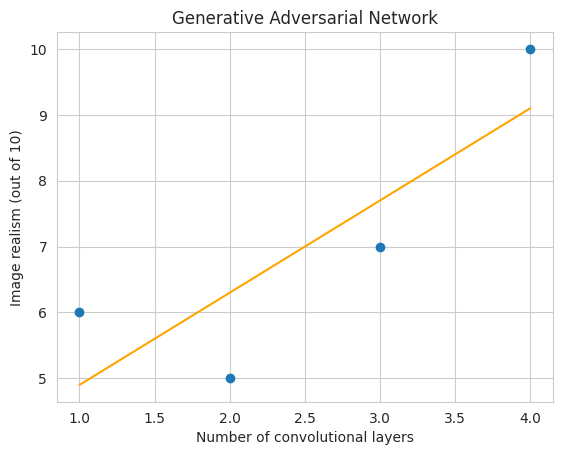

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

For fun, following the linear algebra in the slides, we could output $\hat{y}$ across all the instances $i$:
$$ \hat{y} = Xw $$

In [ ]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [ ]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

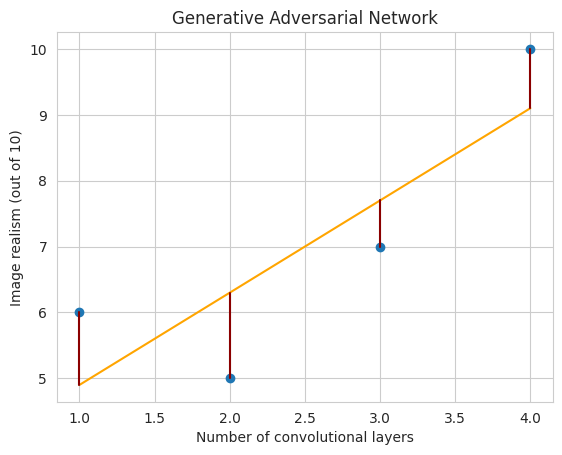

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

The square of these residuals is what we minimize with SSE in OLS regression.

The above OLS approach expands to a wide variety of circumstances:

* Multiple features ($x$, the predictors)
* Polynomial (typically quadratic) features, e.g., $y = \beta_0 + \beta_1 x + \beta_2 x^2$
* Interacting features, e.g., $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$
* Discrete, categorical features, incl. any combination of continuous and discrete features

### Categorical "Dummy" Features

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
sns.set_style('darkgrid')

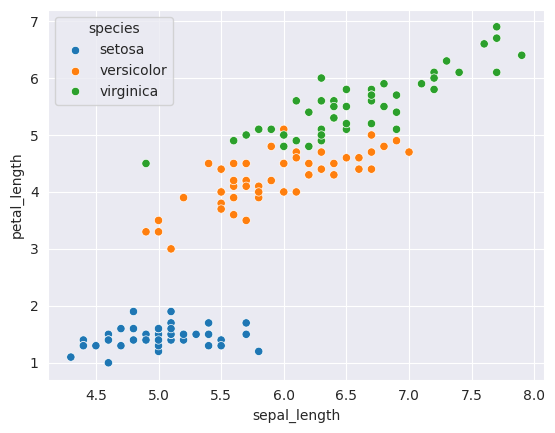

In [ ]:
_= sns.scatterplot(x=iris.sepal_length,y=iris.petal_length,hue=iris.species,data=iris)

In [ ]:
dummy = pd.get_dummies(iris.species,dtype='int64')

In [ ]:
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
y = iris.petal_length

In [ ]:
x = pd.concat([iris.sepal_length,dummy.setosa,dummy.versicolor],axis=1)
x # virginia as "baseline" where setosa and versicolor are both 0

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(x)  #from linear algebra
x

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [ ]:
model = sm.OLS(y,x)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.46e-116
Time:                        08:22:27   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the probability of the each predictor to predict is <.05 it means our model predicts the species correctly

Our earlier iris model, with sepal length as the only predictor of petal length, had $r^2 = 0.76$. In our latest iris model, a whopping 97% of the variance in petal length is explained by the predictors.

In [ ]:
beta = result.params
beta

,0
const,1.387660
sepal_length,0.632110
setosa,-3.090002
versicolor,-0.879864


In [ ]:
xline = np.linspace(4,8,1000) #Sepal length is the slope
vi_yline = beta['const'] + beta['sepal_length']*xline   # AS virginia is our base line it is the normal line remaining lines we have to add the constants
se_yline = beta['const'] + beta['sepal_length']*xline + beta['setosa']
ve_yline = beta['const'] + beta['sepal_length']*xline + beta['versicolor']

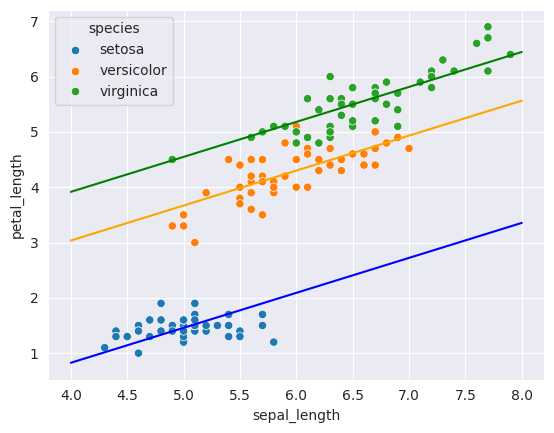

In [ ]:
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=iris)
plt.plot(xline,vi_yline,color='green')
plt.plot(xline,se_yline,color='blue')
_=plt.plot(xline,ve_yline,color='orange')

Now using our refined model, such that it predicts the petal length of a *versicolor* iris with a 5.5cm-long sepal:

In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [ ]:
y_i = beta['const'] + beta['sepal_length']*x_sepall_i+beta['setosa']*x_setosa_i+beta['versicolor']*x_versic_i

In [ ]:
y_i

3.984400080089945

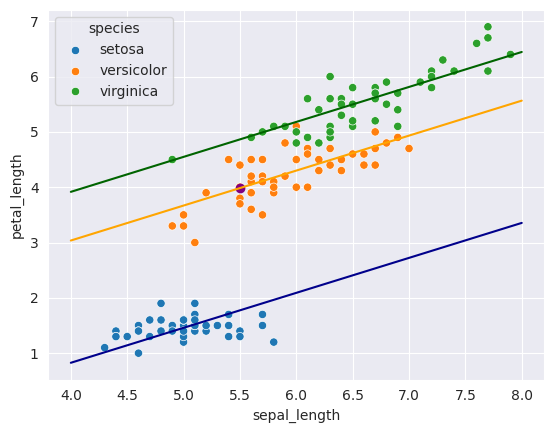

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

Verginica of the same petal length

In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0

In [ ]:
y_i = beta['const'] + beta['sepal_length']*x_sepall_i+beta['setosa']*x_setosa_i+beta['versicolor']*x_versic_i

In [ ]:
y_i

4.864264420040966

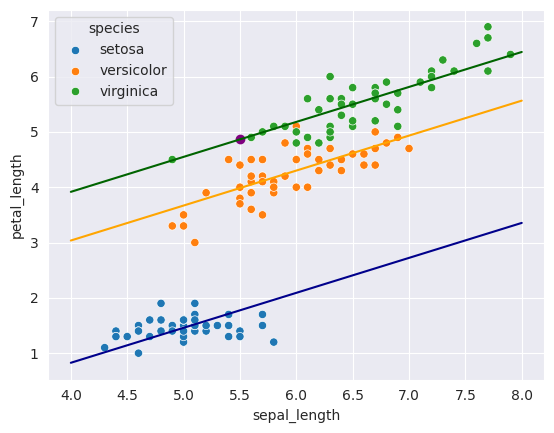

In [ ]:
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=iris)
plt.plot(xline,vi_yline,color='darkgreen')
plt.plot(xline,se_yline,color='darkblue')
plt.plot(xline,ve_yline,color='orange')
_=plt.scatter(x_sepall_i,y_i,marker='o',color='purple')

In [ ]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])

In [ ]:
y_i = np.dot(beta,x_i)

In [ ]:
y_i

4.864264420040966

(It is also possible to have the slope vary by categorical variable, not only the $y$-intercept. This is a *hierarchical linear model* and the classic text on it is [Gelman & Hill, 2006](https://amzn.to/3hoOevb).)

**Exercise**:
Download the California housing dataset (process is immediately below) and use the statsmodels `OLS()` method to create a model that uses at least a few of the provided features to predict house price.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
Y = housing.target

In [ ]:
Y[:20]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4  , 1.525, 1.555,
       1.587, 1.629])

In [ ]:
len(Y)

20640

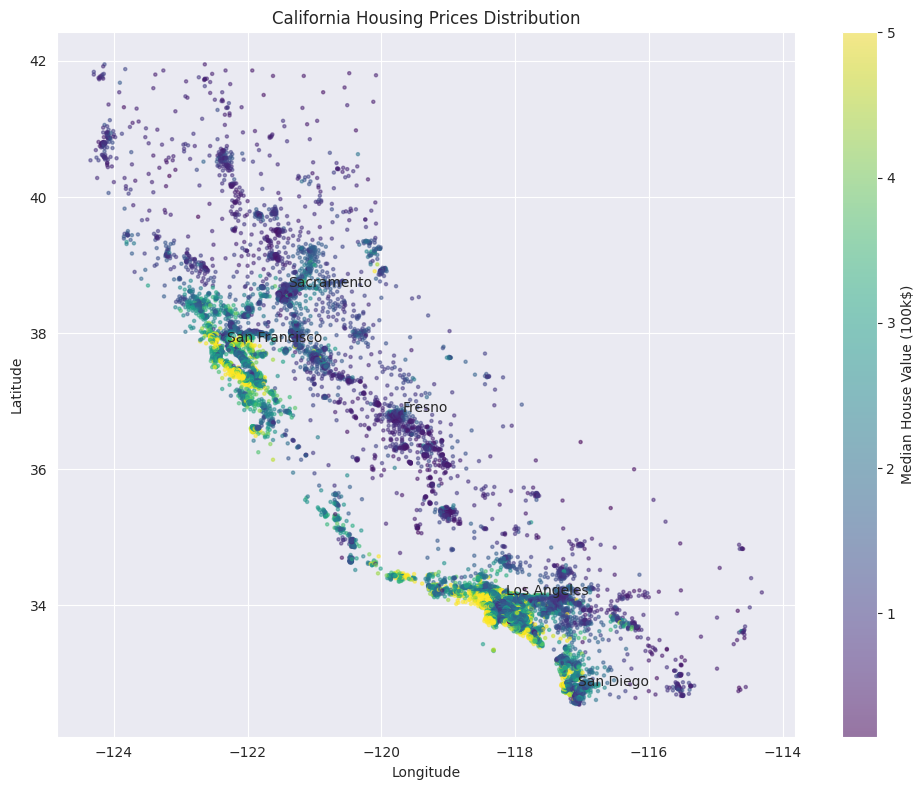

In [ ]:
# ...distributed all across California:
lat = housing.data[:, housing.feature_names.index('Latitude')]
lon = housing.data[:, housing.feature_names.index('Longitude')]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(lon, lat, alpha=0.5, s=5, c=housing.target, cmap='viridis')

plt.title('California Housing Prices Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Median House Value (100k$)')

# Annotate major cities (approximate coordinates)
cities = {
    'San Francisco': (-122.4194, 37.7749),
    'Los Angeles': (-118.2437, 34.0522),
    'San Diego': (-117.1611, 32.7157),
    'Sacramento': (-121.4944, 38.5816),
    'Fresno': (-119.7871, 36.7378)
}

for city, coords in cities.items():
    plt.annotate(city, xy=coords, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
X = pd.DataFrame(housing.data)
X.columns = housing.feature_names
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Description of the feature variables (and more on the dataset in general):
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
X=sm.add_constant(X)
X

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,1.0,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,1.0,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.0,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.0,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
model = sm.OLS(Y,X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:22:32   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From that as p value of the population >0.05 it means that feature is independent of the result so we can neglet that

In [ ]:
beta = result.params
beta

,0
const,-36.941920
MedInc,0.436693
HouseAge,0.009436
AveRooms,-0.107322
AveBedrms,0.645066
Population,-0.000004
AveOccup,-0.003787
Latitude,-0.421314
Longitude,-0.434514


## Logistic Regression

Reasonably often we'd like to have a regression model that predicts a binary outcome (e.g., identifying if a fast-food item is a hot dog or not a hot dog), or giving a review of a movie as +ve or -ve This can be accomplished with **logistic regression**, which adapts linear regression by including the *logit* function:
$$ x = \text{log}(\frac{p}{1-p}) $$
This function uses the natural logarithm and maps a binary probability $p$ (which can only range from zero to one) to an unbounded range ($-\infty$ to $\infty$).

In [ ]:
def logit(my_p): # this is also available as scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [ ]:
logit(0.5)

0.0

In [ ]:
logit(0.1)

-2.197224577336219

In [ ]:
logit(0.01) # closer to zero approaches negative infinity

-4.59511985013459

In [ ]:
logit(0.99) # closer to one approaches positive infinity

4.595119850134589

More specifically, logistic regression makes use of the *expit* function (a.k.a., logistic function), which is the inverse of the logit. That is, it returns a probability $p$ when passed some unbounded input $x$:
$$ p = \frac{1}{1+e^{-x}} $$

In [ ]:
def expit(my_x): # this is also available as scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [ ]:
expit(4.595119850134589)

0.99

This logistic function allows us to map the unbounded output of a linear regression model to a probability ranging from zero to one.

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
np.unique(titanic.survived,return_counts=True)

(array([0, 1]), array([549, 342]))

In [ ]:
np.unique(titanic.sex,return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [ ]:
np.unique(titanic.pclass,return_counts=True)

(array([1, 2, 3]), array([216, 184, 491]))

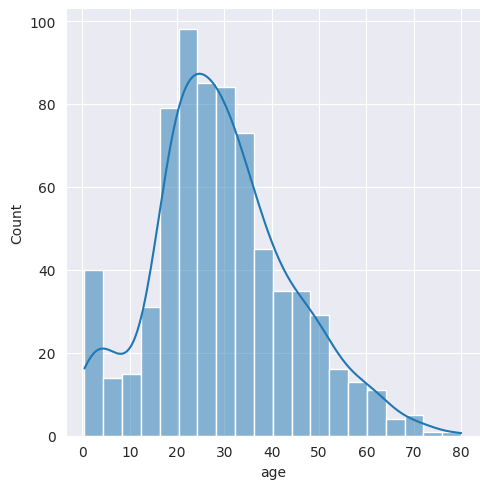

In [ ]:
_=sns.displot(titanic.age,kde=True)

In [ ]:
gender = pd.get_dummies(titanic.sex,dtype='int64')
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
clas = pd.get_dummies(titanic.pclass,dtype='int64')
clas

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
clas.columns = ['First','Second','Third']

In [ ]:
y = titanic.survived

In [ ]:
X = pd.concat([clas.First,clas.Second,gender.female,titanic.age],axis=1)

In [ ]:
X = sm.add_constant(X)
X

,const,First,Second,female,age
0,1.0,0,0,0,22.0
1,1.0,1,0,1,38.0
2,1.0,0,0,1,26.0
3,1.0,1,0,1,35.0
4,1.0,0,0,0,35.0
...,...,...,...,...,...
886,1.0,0,1,0,27.0
887,1.0,1,0,1,19.0
888,1.0,0,0,1,NaN
889,1.0,1,0,0,26.0


In [ ]:
model = sm.Logit(y,X,missing='drop')  # We are dropping the rows which contain Nan values

In [ ]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3289
Time:                        09:10:57   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3264      0.248     -5.351      0.000      -1.812      -0.841
First          2.5806      0.281      9.169      0.000       2.029       3.132
Second         1.2708      0.244      5.207      0.000       0.793       1.749
female         2.5228      0.207     12.164      0.000       2.116       2.929
age           -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==============================================================================
"""

By seeing the Z score we can say gender is the most important feature as it is +ve the females are more likely to survive and mens are likely to die. And we can say people in first class are more likely to survive than 2nd class and 3rd class people has less chances to survive. And age has -ve Z value which means if the people are more older they have the less chance to survive

In [ ]:
beta = result.params

In [ ]:
beta

,0
const,-1.326394
First,2.580625
Second,1.270826
female,2.522781
age,-0.036985


As an example, our model suggests a 17-year-old female traveling in first class (such as Rose in the 1997 James Cameron film) had a 95.9% of chance of surviving:

In [ ]:
linear_out = beta['const'] + beta['First']*1 + beta['Second']*0 + beta['female']*1 + beta['age']*17
linear_out

3.148263137776477

In [ ]:
expit(linear_out)

0.9588402300157423

In contrast, a 20-year-old male traveling in third class had an 11.2% chance of surviving

In [ ]:
def survive_not(clas,gender,age):

    if(clas == 1):
      linear_out = beta['const'] + beta['First']*1 + beta['Second']*0 + beta['female']*gender + beta['age']*age
    elif(clas == 2):
      linear_out = beta['const'] + beta['First']*0 + beta['Second']*1 + beta['female']*gender + beta['age']*age
    else:
      linear_out = beta['const'] + beta['First']*0 + beta['Second']*0 + beta['female']*gender + beta['age']*age
    return expit(linear_out)

In [ ]:
survive_not(3,0,20)

0.11243575692429553

In [ ]:
jack = np.array([1,0,0,0,20])

In [ ]:
linear_out = np.dot(beta,jack)

In [ ]:
expit(linear_out)

0.11243575692429553

**Exercises**

1. Use the scikit-learn `train_test_split()` method ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) to split the titanic data into a training data set (say, two thirds of the data) and a test data set (one third of the data).

2. Re-train the OLS model above using your newly-created training data set. Using the test data set, test the model's quality, e.g., with respect to:

    * Accuracy (using a standard 50% binary classification threshold)
    * Area under the receiving operator characteristic curve (we covered this in [Calculus II](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb)).

3. Use your own creative whims to add additional features to an OLS model and train it using the training set. How does your new model compare on the test data set metrics relative to the baseline model? And how do they compare to the [Kaggle leaderboard](https://www.kaggle.com/c/titanic/leaderboard)?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic_training, titanic_test = train_test_split(titanic,test_size=0.25,shuffle=True)

In [ ]:
titanic_training

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
226,1,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,yes,True
769,0,3,male,32.0,0,0,8.3625,S,Third,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
169,0,3,male,28.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
159,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False


In [ ]:
titanic_test

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True
432,1,2,female,42.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
646,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
72,0,2,male,21.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
626,0,2,male,57.0,0,0,12.3500,Q,Second,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
388,0,3,male,NaN,0,0,7.7292,Q,Third,man,True,NaN,Queenstown,no,True
864,0,2,male,24.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
712,1,1,male,48.0,1,0,52.0000,S,First,man,True,C,Southampton,yes,False


In [ ]:
gender = pd.get_dummies(titanic_training.sex,dtype='int64')
gender

,female,male
179,0,1
226,0,1
769,0,1
888,1,0
169,0,1
...,...,...
13,0,1
152,0,1
159,0,1
58,1,0


In [ ]:
clas = pd.get_dummies(titanic_training.pclass,dtype='int64')
clas

,1,2,3
179,0,0,1
226,0,1,0
769,0,0,1
888,0,0,1
169,0,0,1
...,...,...,...
13,0,0,1
152,0,0,1
159,0,0,1
58,0,1,0


In [ ]:
clas.columns = ['First','Second','Third']

In [ ]:
np.unique(titanic_training.sibsp,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 8]), array([452, 157,  24,  11,  12,   5,   7]))

In [ ]:
sibsp = pd.get_dummies(titanic_training.sibsp,dtype='int64')
sibsp

,0,1,2,3,4,5,8
179,1,0,0,0,0,0,0
226,1,0,0,0,0,0,0
769,1,0,0,0,0,0,0
888,0,1,0,0,0,0,0
169,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
13,0,1,0,0,0,0,0
152,1,0,0,0,0,0,0
159,0,0,0,0,0,0,1
58,0,1,0,0,0,0,0


In [ ]:
sibsp.columns = ['a','b','c','d','e','f','g']

In [ ]:
np.unique(titanic.parch,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([678, 118,  80,   5,   4,   5,   1]))

In [ ]:
parch = pd.get_dummies(titanic_training.parch,dtype='int64')
parch

,0,1,2,3,4,5,6
179,1,0,0,0,0,0,0
226,1,0,0,0,0,0,0
769,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
169,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
13,0,0,0,0,0,1,0
152,1,0,0,0,0,0,0
159,0,0,1,0,0,0,0
58,0,0,1,0,0,0,0


In [ ]:
parch.columns = ['aa','bb','cc','dd','ee','ff','gg']

In [ ]:
X = pd.concat([gender.female,clas.First,clas.Second,titanic_training.age,sibsp.a,sibsp.b,],axis=1)
X

,female,First,Second,age,a,b
179,0,0,0,36.0,1,0
226,0,0,1,19.0,1,0
769,0,0,0,32.0,1,0
888,1,0,0,NaN,0,1
169,0,0,0,28.0,1,0
...,...,...,...,...,...,...
13,0,0,0,39.0,0,1
152,0,0,0,55.5,1,0
159,0,0,0,NaN,0,0
58,1,0,1,5.0,0,1


In [ ]:
X = sm.add_constant(X)

In [ ]:
y = titanic_training.survived

In [ ]:
model = sm.OLS(y,X,missing='drop')

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     56.18
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           8.08e-54
Time:                        09:57:52   Log-Likelihood:                -255.29
No. Observations:                 545   AIC:                             524.6
Df Residuals:                     538   BIC:                             554.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1379      0.062      2.212      0.027       0.015       0.260
female         0.4907      0.036     13.592      0.000       0.420       0.562
First          0.3835      0.045      8.558      0.000       0.296       0.472
Second         0.1861      0.043      4.364      0.000       0.102       0.270
age           -0.0064      0.001     -4.884      0.000      -0.009      -0.004
a              0.1728      0.063      2.726      0.007       0.048       0.297
b              0.1401      0.068      2.052      0.041       0.006       0.274
==============================================================================
Omnibus:                       19.403   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.813
Skew:                           0.479   Prob(JB):                     3.02e-05
Kurtosis:                       3.011   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
gender1 = pd.get_dummies(titanic_test.sex,dtype='int64')

In [ ]:
clas1 = pd.get_dummies(titanic_test.pclass,dtype='int64')

In [ ]:
clas1.columns = ['First','Second','Third']

In [ ]:
sibsp1 = pd.get_dummies(titanic_test.sibsp,dtype='int64')

In [ ]:
sibsp1

,0,1,2,3,4
583,1,0,0,0,0
432,0,1,0,0,0
646,1,0,0,0,0
72,1,0,0,0,0
626,1,0,0,0,0
...,...,...,...,...,...
65,0,1,0,0,0
388,1,0,0,0,0
864,1,0,0,0,0
712,0,1,0,0,0


In [ ]:
np.unique(sibsp1,return_counts=True)

(array([0, 1]), array([892, 223]))

In [ ]:
sibsp1.columns = ['a','b','c','d','e']

In [ ]:
test = pd.concat([gender1.female,clas1.First,clas1.Second,titanic_test.age,sibsp1.a,sibsp1.b],axis=1)

In [ ]:
test = sm.add_constant(test)

In [ ]:
test.dropna()

,const,female,First,Second,age,a,b
583,1.0,0,1,0,36.0,1,0
432,1.0,1,0,1,42.0,0,1
646,1.0,0,0,0,19.0,1,0
72,1.0,0,0,1,21.0,1,0
626,1.0,0,0,1,57.0,1,0
...,...,...,...,...,...,...,...
620,1.0,0,0,0,27.0,0,1
477,1.0,0,0,0,29.0,0,1
319,1.0,1,1,0,40.0,0,1
864,1.0,0,0,1,24.0,1,0


In [ ]:
y_pred = result.predict(test)

In [ ]:
y_pred.dropna()

,0
583,0.462866
432,0.684906
646,0.188594
72,0.361878
626,0.130493
...,...
620,0.104484
477,0.091629
319,0.895159
864,0.342596


In [ ]:
y_test = titanic_test.survived

In [ ]:
ypred = [1 if prob >= 0.5 else 0 for prob in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.34%


**Area under ROC curve**

In [ ]:
# from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
auc = roc_auc_score(y_test, ypred)

In [ ]:
print(f'AUC: {auc:.2f}')

AUC: 0.72


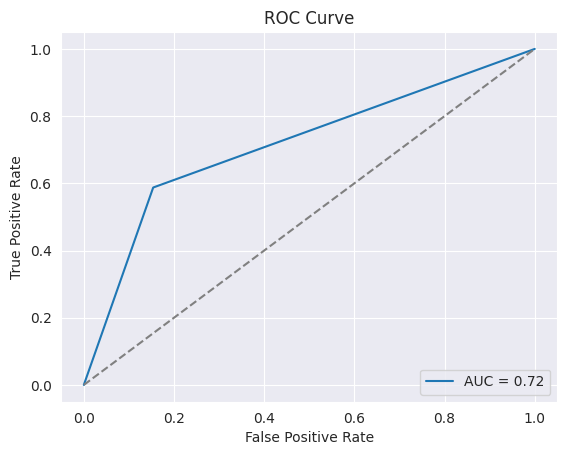

In [ ]:
# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Bayesian Statistics

### Baye's Theorem
...allows us to find $P(\text{x}|\text{y})$ when we have $P(\text{y}|\text{x})$:
$$ P(\text{x}|\text{y}) = \frac{P(\text{x})P(\text{y}|\text{x})}{P(\text{y})} $$


Let's use the *xkcd* [exploding sun cartoon](https://xkcd.com/1132/) as an example. Using a standard $\alpha = .05$ threshold, the frequentist rejected the null hypothesis that the sun hadn't exploded because the probability the neutrino detector outputs `YES` when the sun hasn't exploded is $\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.0278$, which is $<.05$.


Using Bayes' theorem, the Bayesian statistician incorporates additional information -- largely related to the probability that the sun has exploded irrespective what the neutrino detector says -- to draw a different conclusion.

Let's likewise use some back-of-the-envelope figures to estimate the probability the sun has exploded ($x = \text{exploded}$) given the neutrino detector output `YES` ($y = \text{YES}$); that is, $P(x|y)$. To find this, we'll need $P(y|x)$, $P(x)$, and $P(y)$.

$P(y = \text{YES} | x = \text{exploded}) = \frac{35}{36} \approx 0.972 $.

$P(x = \text{exploded})$ can be roughly estimated. It is generous to assume a $\frac{1}{1000}$ chance because for every thousand days that pass, the sun explodes far less often than once. Further, unless the sun had exploded only in the past few minutes, we'd already be dead. So, the probability that we are alive in an instant where the sun has exploded is extremely small. Anyway, let's go with $\frac{1}{1000}$ because even with this exceedingly generous figure, we'll demonstrate the point.

$P(y = \text{YES})$: As is often the case, this probability in the Bayes' theorem denominator can be calculated with information we already have because:
$$ P(\text{y}) = \sum_x P(\text{y}|x)P(x) $$
Summing over the two possible states of x ($x =$ exploded, $x =$ not exploded):
$$ P(y = \text{YES}) = P(\text{YES given exploded})P(\text{exploded}) + P(\text{YES given not exploded})P(\text{not exploded}) $$
$$ = \left(\frac{35}{36}\right)\left(\frac{1}{1000}\right) + \left(\frac{1}{36}\right)\left(\frac{999}{1000}\right) $$
...which comes out to $P(y = \text{YES}) \approx 0.0287$:

In [ ]:
 py = (35/36.)*(1/1000.) + (1/36.)*(999/1000.)
py

0.02872222222222222

Now we have everything we need to apply Bayes' theorem:

In [ ]:
py_givenx = 0.972
px = .0001

In [ ]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

In [ ]:
bayes(px, py_givenx, py)

0.0033841392649903296

Therefore, even with our generous baseline estimate of a $\frac{1}{1000}$ chance of the sun having exploded, Bayes' rule enables us to find a 0.3% chance the sun has exploded given the neutrino detector output `YES`. Certainly odds that merit making a $50 bet!

It would require several hours to describe Bayesian inference beyond Bayes' theorem, but here are "getting started" pages for each of the primary Python libraries, ordered roughly from most lightweight (easier to pick up) to most involved:

* [NumPyro](https://num.pyro.ai/en/latest/getting_started.html)
* [PyMC](https://www.pymc.io/projects/docs/en/stable/learn.html)
* [PyStan](https://pystan.readthedocs.io/en/latest/)